In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("data.xlsx")
df.head()

,setting,date,source,indicator_abbr,indicator_name,dimension,subgroup,estimate,se,ci_lb,...,iso3,favourable_indicator,indicator_scale,ordered_dimension,subgroup_order,reference_subgroup,whoreg6,wbincome2024,update,dataset_id
0,Afghanistan,2007,WHO Global Health Observatory,FINPROTECTION_CATA_TOT_10_POP,Population with household spending on health g...,Household composition,Adults only (20-59 years),3.19,NaN,NaN,...,AFG,0,100,0,0,0,Eastern Mediterranean,Low income,20 September 2024,rep_gho_hc
1,Afghanistan,2007,WHO Global Health Observatory,FINPROTECTION_CATA_TOT_10_POP,Population with household spending on health g...,Household composition,Adults with children and adolescents,4.29,NaN,NaN,...,AFG,0,100,0,0,0,Eastern Mediterranean,Low income,20 September 2024,rep_gho_hc
2,Afghanistan,2007,WHO Global Health Observatory,FINPROTECTION_CATA_TOT_10_POP,Population with household spending on health g...,Household composition,Multigenerational and/or adults with older per...,6.18,NaN,NaN,...,AFG,0,100,0,0,0,Eastern Mediterranean,Low income,20 September 2024,rep_gho_hc
3,Afghanistan,2007,WHO Global Health Observatory,FINPROTECTION_CATA_TOT_10_POP,Population with household spending on health g...,Household composition,Multigenerational households,6.18,NaN,NaN,...,AFG,0,100,0,0,0,Eastern Mediterranean,Low income,20 September 2024,rep_gho_hc
4,Afghanistan,2013,WHO Global Health Observatory,FINPROTECTION_CATA_TOT_10_POP,Population with household spending on health g...,Household composition,Adults only (20-59 years),20.60,NaN,NaN,...,AFG,0,100,0,0,0,Eastern Mediterranean,Low income,20 September 2024,rep_gho_hc


['Cataract surgical coverage of adults aged 50 and over (%)'
 'Effective cataract surgical coverage of adults aged 50 and over (%)']


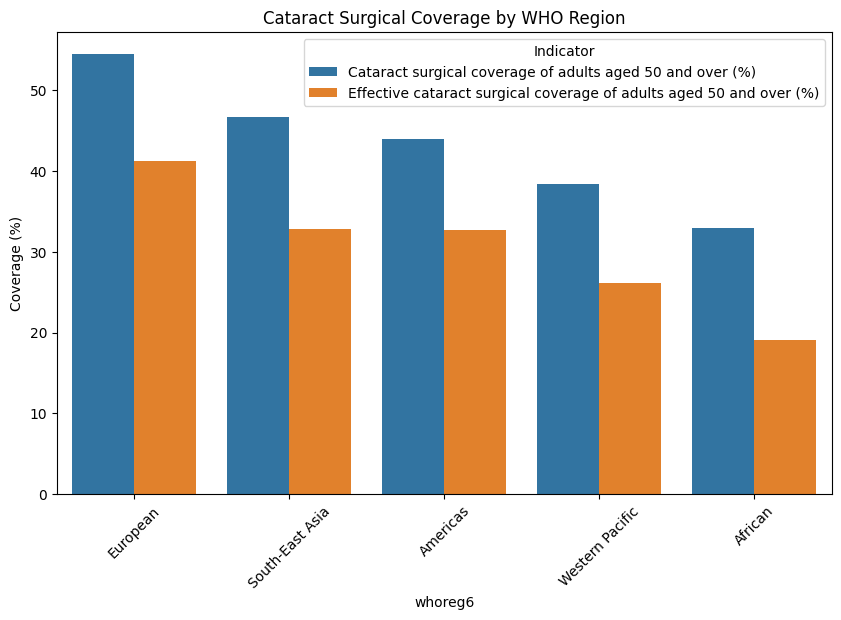

In [4]:
# Question 1: How does cataract surgical coverage vary across WHO regions?

matches = df[df['indicator_name'].str.contains("coverage|essential", case=False, na=False)]
print(matches['indicator_name'].unique())

uhc = df[df['indicator_name'].str.contains("cataract surgical coverage", case=False, na=False)]
uhc.head()

region_avg = uhc.groupby(["whoreg6","indicator_name"])["estimate"].mean().reset_index()
region_avg = region_avg.sort_values("estimate", ascending=False)
region_avg

plt.figure(figsize=(10,6))
sns.barplot(data=region_avg, x="whoreg6", y="estimate", hue="indicator_name")
plt.title("Cataract Surgical Coverage by WHO Region")
plt.ylabel("Coverage (%)")
plt.xticks(rotation=45)
plt.legend(title="Indicator")
plt.show()

['Medical doctors (%)']


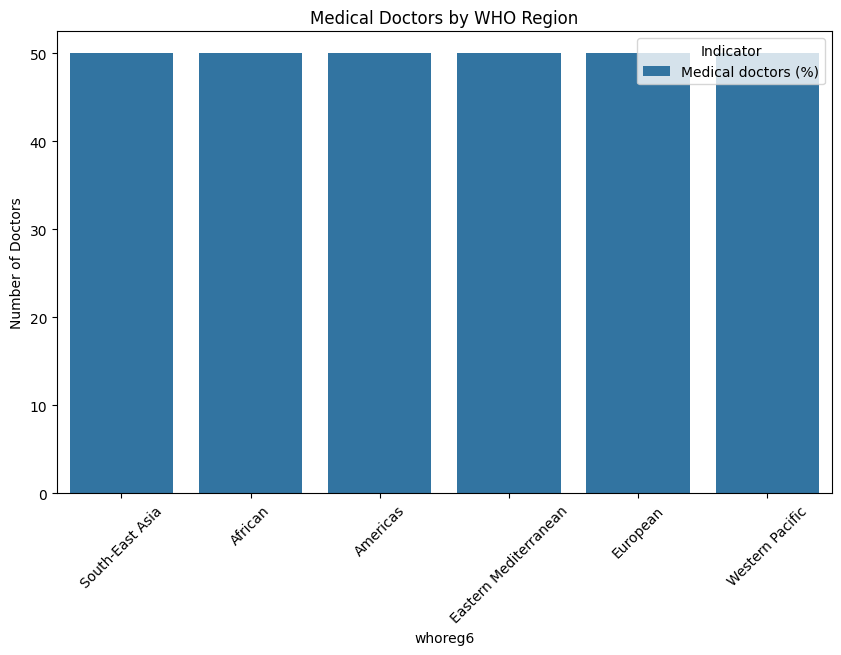

In [14]:
# question 2: How does the density of medical doctors vary across WHO regions?

matches = df[df['indicator_name'].str.contains("doctors", case=False, na=False)]
print(matches['indicator_name'].unique())

doctors = df[df['indicator_name'].str.contains("medical doctors", case=False, na=False)]
doctors.head()

region_avg = doctors.groupby(["whoreg6","indicator_name"])["estimate"].mean().reset_index()
region_avg = region_avg.sort_values("estimate", ascending=False)
region_avg

plt.figure(figsize=(10,6))
sns.barplot(data=region_avg, x="whoreg6", y="estimate", hue="indicator_name")
plt.title("Medical Doctors by WHO Region")
plt.ylabel("Number of Doctors")

plt.xticks(rotation=45)
plt.legend(title="Indicator")
plt.show()


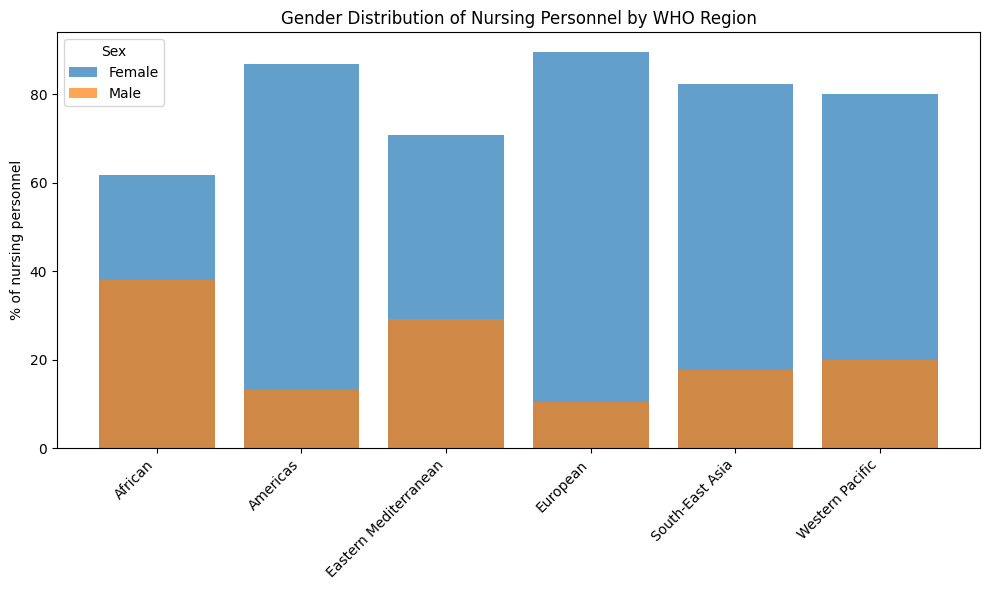

In [28]:
# Question 3: What is the gender distribution of nursing personnel across WHO regions?

nursing = df[df["indicator_name"].str.contains("Nursing personnel", case=False, na=False)].copy()

nursing_latest = (nursing.sort_values("date").groupby(["setting", "subgroup"], as_index=False).tail(1))

nursing_region = (nursing_latest.groupby(["whoreg6", "subgroup"])["estimate"].mean().reset_index())

plt.figure(figsize=(10,6))
for sex in nursing_region["subgroup"].unique():
    sub = nursing_region[nursing_region["subgroup"] == sex]
    plt.bar(sub["whoreg6"], sub["estimate"], label=sex, alpha=0.7)

plt.title("Gender Distribution of Nursing Personnel by WHO Region")
plt.ylabel("% of nursing personnel")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Sex")
plt.tight_layout()
plt.show()

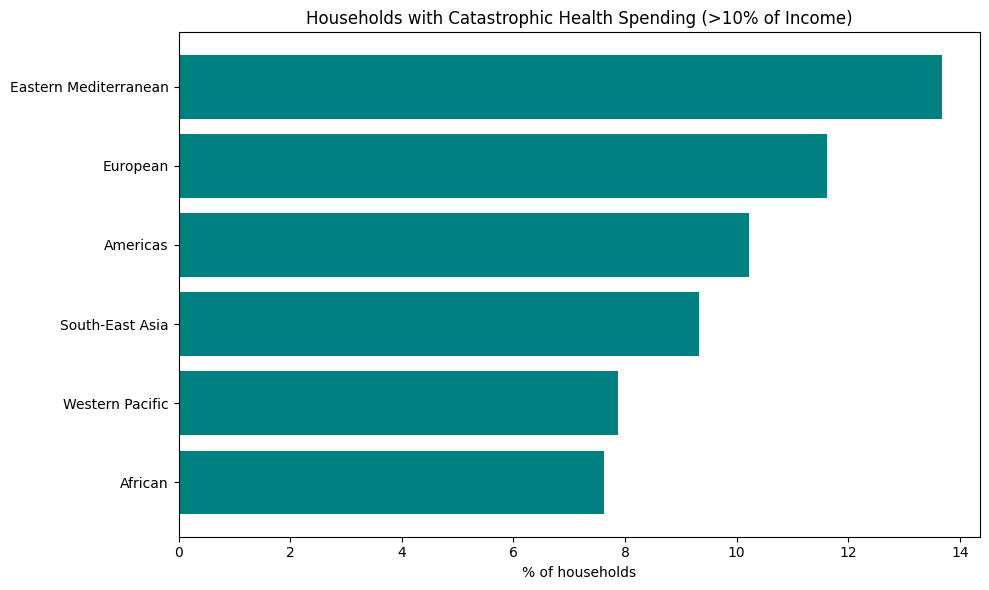

In [29]:
# Question 4: What proportion of households face catastrophic health expenditures (>10% of income)?

q4 = df[df["indicator_name"].str.contains("greater than 10% of total household budget", case=False, na=False)].copy()

q4_latest = (q4.sort_values("date").groupby("setting", as_index=False).tail(1))

q4_region = (q4_latest.groupby("whoreg6")["estimate"].mean().reset_index().sort_values("estimate", ascending=True))

plt.figure(figsize=(10,6))
plt.barh(q4_region["whoreg6"], q4_region["estimate"], color="teal")
plt.title("Households with Catastrophic Health Spending (>10% of Income)")
plt.xlabel("% of households")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1891124765.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


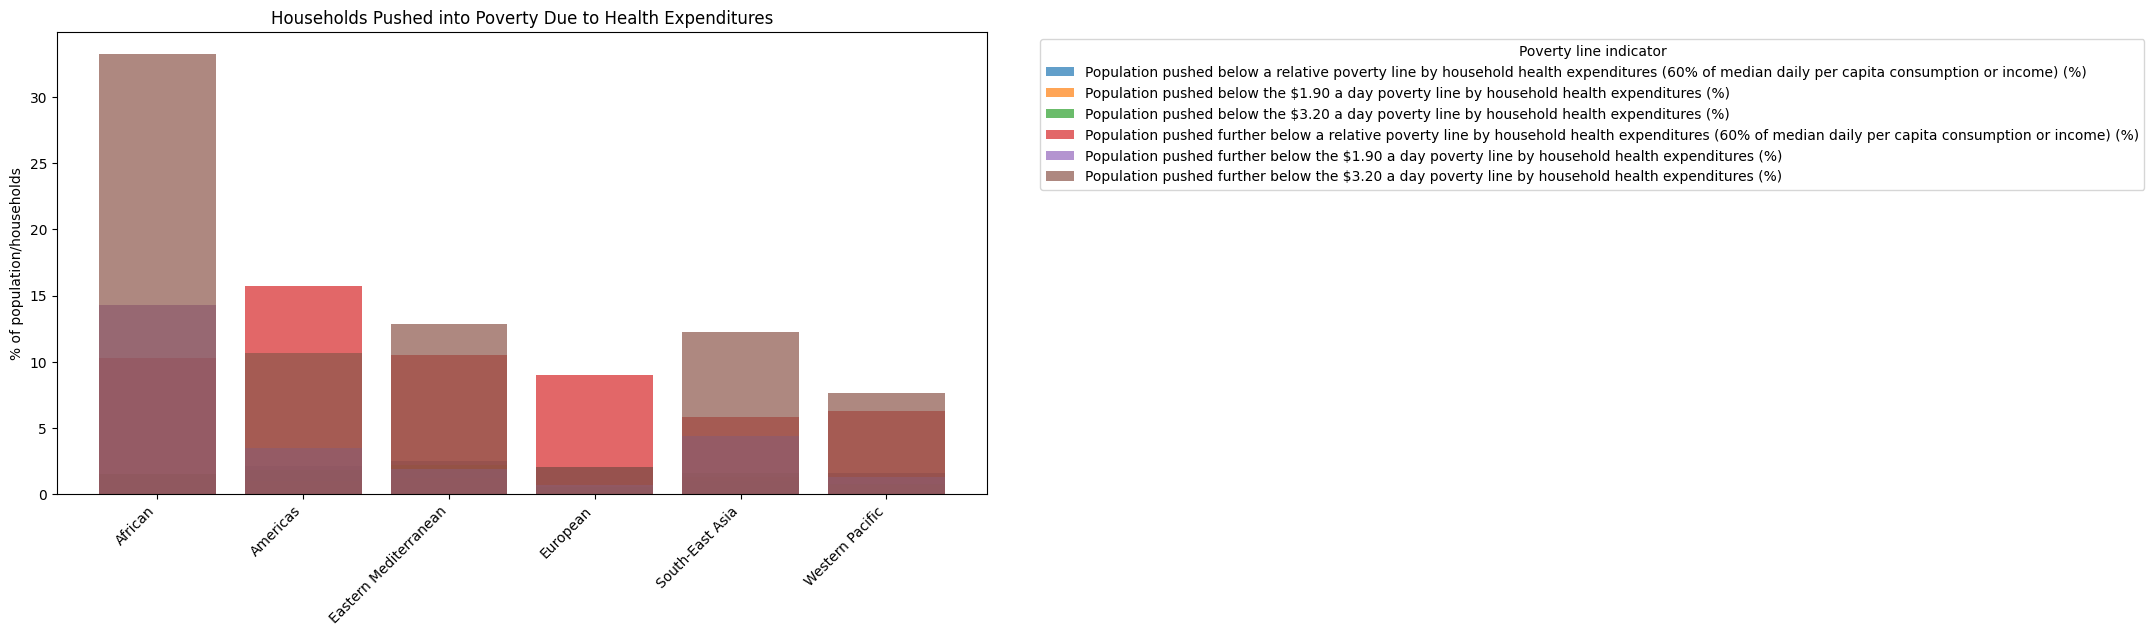

In [30]:
# Question 5: Which regions have the highest share of households pushed into poverty due to health expenditures?

import matplotlib.pyplot as plt

# Filter for poverty impact indicators
q5 = df[df["indicator_name"].str.contains("pushed.*poverty.*household health expenditures",
                                          case=False, na=False)].copy()

# Keep latest year per country and indicator
q5_latest = (q5.sort_values("date")
                .groupby(["setting", "indicator_name"], as_index=False)
                .tail(1))

# Regional averages
q5_region = (q5_latest.groupby(["whoreg6", "indicator_name"])["estimate"]
                        .mean()
                        .reset_index())

# Plot
plt.figure(figsize=(12,6))
for ind in q5_region["indicator_name"].unique():
    sub = q5_region[q5_region["indicator_name"] == ind]
    plt.bar(sub["whoreg6"], sub["estimate"], label=ind, alpha=0.7)

plt.title("Households Pushed into Poverty Due to Health Expenditures")
plt.ylabel("% of population/households")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Poverty line indicator", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


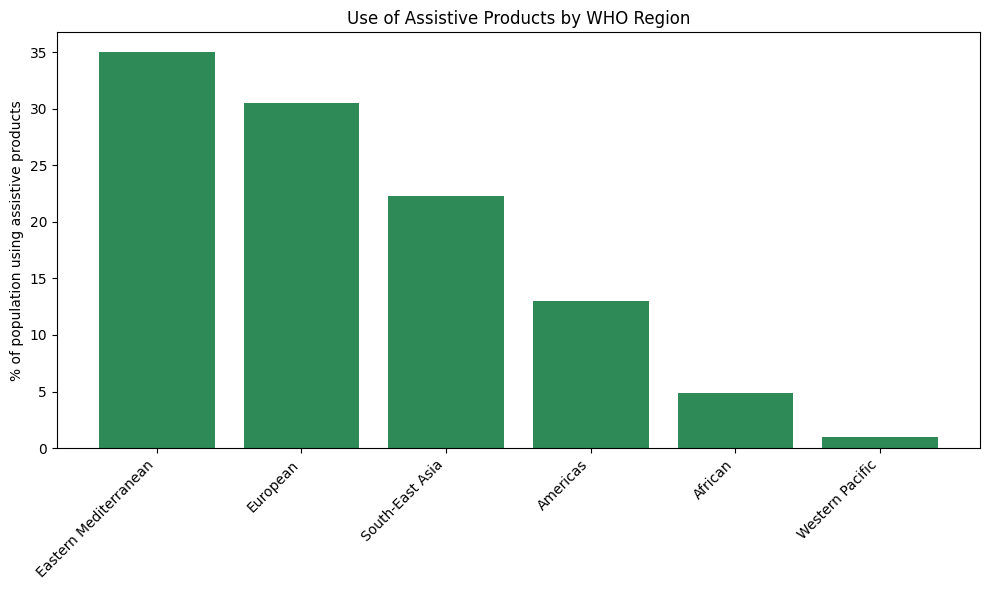

In [37]:
# Question 6: How does the use of assistive products vary across WHO regions?

q6 = df[df["indicator_name"].str.contains("Use of assistive products", case=False, na=False)].copy()

q6_latest = (q6.sort_values("date").groupby("setting", as_index=False).tail(1))

q6_region = (q6_latest.groupby("whoreg6")["estimate"].mean().reset_index().sort_values("estimate", ascending=False))

plt.figure(figsize=(10,6))
plt.bar(q6_region["whoreg6"], q6_region["estimate"], color="seagreen")
plt.title("Use of Assistive Products by WHO Region")
plt.ylabel("% of population using assistive products")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

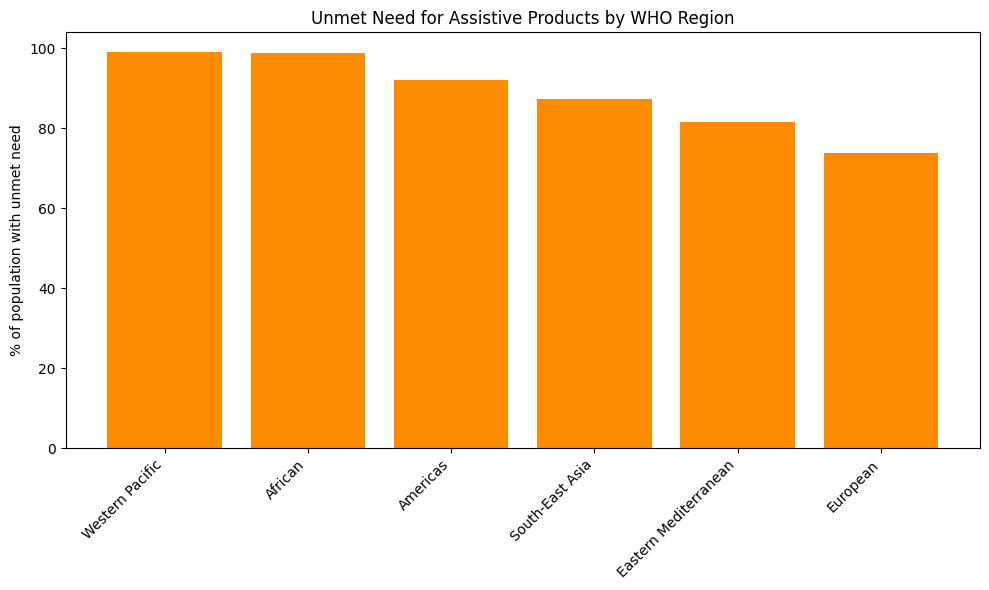

In [40]:
# Question 7: What is the unmet need for assistive products across WHO regions?

q7 = df[df["indicator_name"].str.contains("Unmet need of assistive products",
                                          case=False, na=False)].copy()

if q7.empty:
    q7_met = df[df["indicator_name"].str.contains("Met need of assistive products", case=False, na=False)].copy()
    q7_met["estimate"] = 100 - q7_met["estimate"]
    q7 = q7_met

q7_latest = (q7.sort_values("date").groupby("setting", as_index=False).tail(1))

q7_region = (q7_latest.groupby("whoreg6")["estimate"].mean().reset_index().sort_values("estimate", ascending=False))

plt.figure(figsize=(10,6))
plt.bar(q7_region["whoreg6"], q7_region["estimate"], color="darkorange")
plt.title("Unmet Need for Assistive Products by WHO Region")
plt.ylabel("% of population with unmet need")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

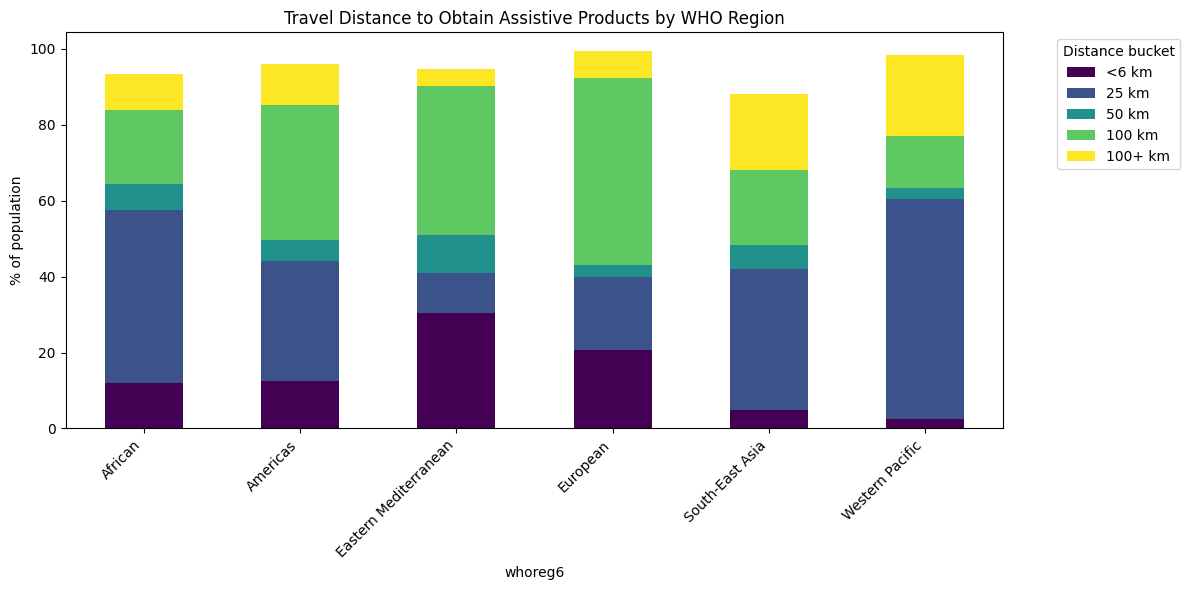

In [42]:
# Question 8: How far do people need to travel to obtain assistive products across WHO regions?

q8 = df[df["indicator_name"].str.contains("Travel distance to obtain assistive products", case=False, na=False)].copy()

q8["distance_bucket"] = q8["indicator_name"].str.extract(r"(\d+\+? km|< ?\d+ km)")

q8_latest = (q8.sort_values("date").groupby(["setting","distance_bucket"], as_index=False).tail(1))

q8_region = (q8_latest.groupby(["whoreg6","distance_bucket"])["estimate"].mean().reset_index())

pivot = q8_region.pivot(index="whoreg6", columns="distance_bucket", values="estimate").fillna(0)
pivot = pivot[sorted(pivot.columns, key=lambda x: int(x.split()[0].replace("<","").replace("+","")))]

pivot.plot(kind="bar", stacked=True, figsize=(12,6), colormap="viridis")
plt.title("Travel Distance to Obtain Assistive Products by WHO Region")
plt.ylabel("% of population")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Distance bucket", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

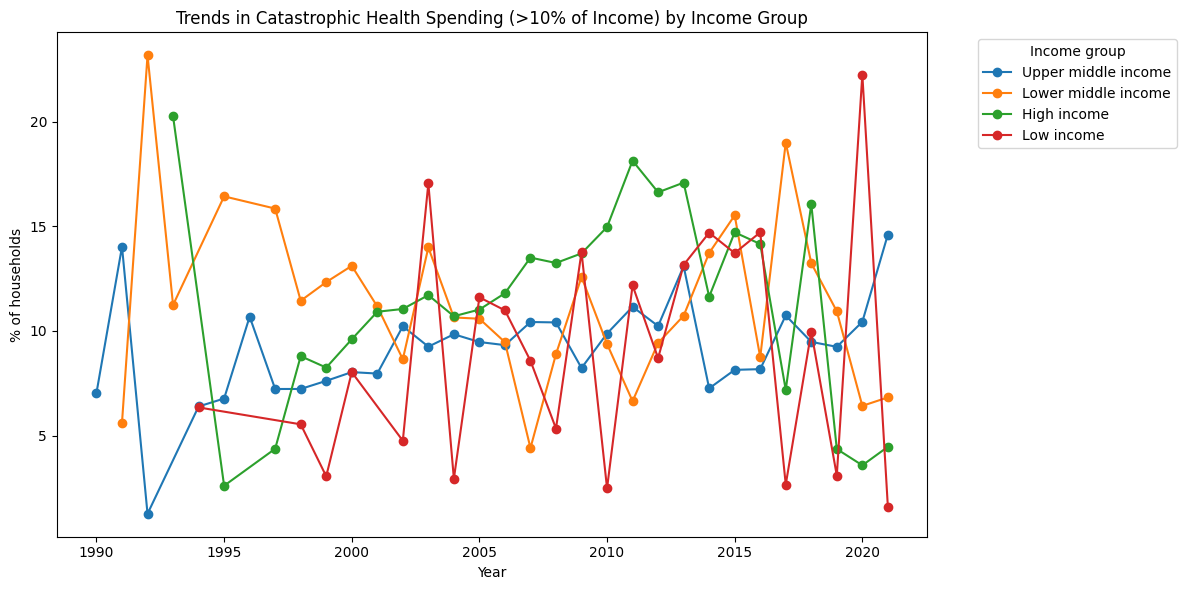

In [45]:
# Question 9: How has catastrophic health spending (>10% of income) changed over time across income groups?

q9 = df[df["indicator_name"].str.contains("greater than 10% of total household budget", case=False, na=False)].copy()

q9 = q9[q9["wbincome2024"].notna() & q9["date"].notna()]

q9_trend = (q9.groupby(["wbincome2024","date"])["estimate"].mean().reset_index().sort_values("date"))

plt.figure(figsize=(12,6))
for group in q9_trend["wbincome2024"].unique():
    sub = q9_trend[q9_trend["wbincome2024"] == group]
    plt.plot(sub["date"], sub["estimate"], marker="o", label=group)

plt.title("Trends in Catastrophic Health Spending (>10% of Income) by Income Group")
plt.xlabel("Year")
plt.ylabel("% of households")
plt.legend(title="Income group", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1197886472.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=sorted(q10_latest["wbincome2024"].unique()), showmeans=True)


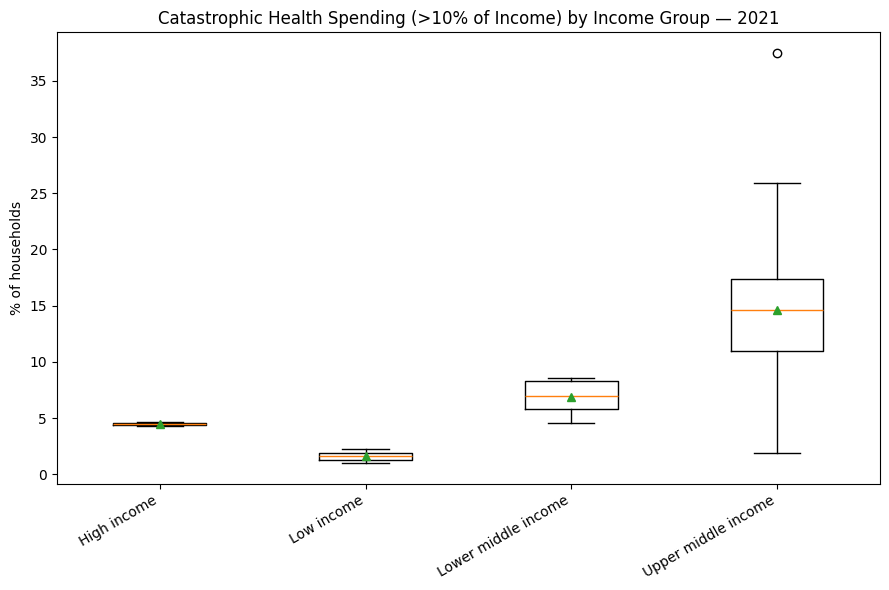

In [47]:
# Question 10: How does financial protection differ across income groups in the latest year?

q10 = df[df["indicator_name"].str.contains("greater than 10% of total household budget", case=False, na=False)].copy()

latest_year = int(q10["date"].dropna().max())
q10_latest = q10[q10["date"] == latest_year]

q10_latest = q10_latest[q10_latest["wbincome2024"].notna()]

groups = [q10_latest[q10_latest["wbincome2024"]==g]["estimate"].dropna().values
          for g in sorted(q10_latest["wbincome2024"].unique())]

plt.figure(figsize=(9,6))
plt.boxplot(groups, labels=sorted(q10_latest["wbincome2024"].unique()), showmeans=True)
plt.title(f"Catastrophic Health Spending (>10% of Income) by Income Group — {latest_year}")
plt.ylabel("% of households")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()